In [1]:
import os

os.chdir("../../")

import neuralprophet as nprophet
from matplotlib import pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=2.0, style="whitegrid")

In [2]:
ts_data = ingestion.read_combined()
ts_data.dropna(subset=["consumption"], inplace=True)

# Reset index
ts_data.reset_index(inplace=True)

# Rename columns to match NeuralProphet requirements
ts_data.rename(columns={"consumption": "y", "index": "ds"}, inplace=True)

(df_train, df_val) = nprophet.split_df(ts_data, 5, 30)

WARNING - (py.warnings._showwarnmsg) - d:\anaconda3\envs\neuralprophet\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")

WARNING - (py.warnings._showwarnmsg) - d:\anaconda3\envs\neuralprophet\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")

WARNING - (py.warnings._showwarnmsg) - d:\anaconda3\envs\neuralprophet\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")

WARNING - (py.warnings._showwarnmsg) - d:\anaconda3\envs\neuralprophet\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's 

In [3]:
model = nprophet.NeuralProphet(n_forecasts=30, n_lags=5)

metrics = model.fit(df_train[["ds", "y"]])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 162
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (58) is too small than the required number for the learning rate finder (232). The results might not be optimal.


Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [4]:
model.test(df_val[["ds", "y"]])

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01735799014568329
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


,Loss_test,RegLoss_test
0,0.017358,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.783% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 58it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


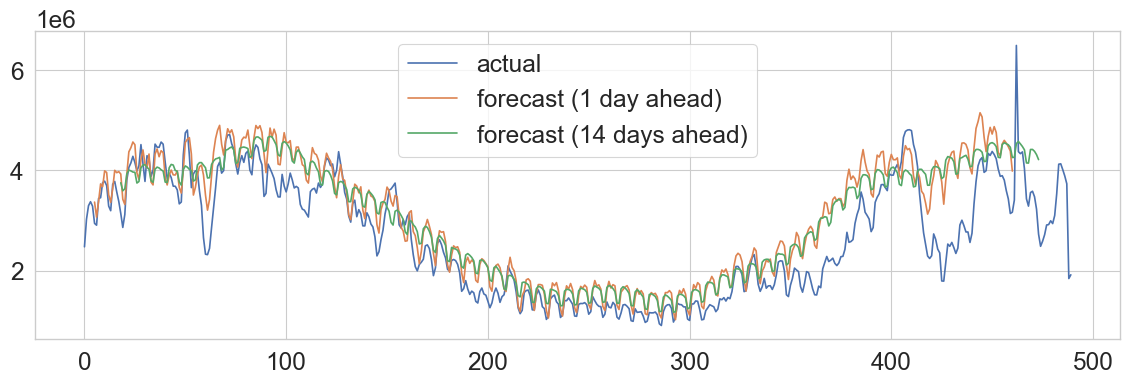

In [6]:
# Use the first 5 days of the validation set to predict the next 30 days and plot it against the actual values
future = model.make_future_dataframe(df_val[['y', 'ds']].iloc[:-30], periods=30, n_historic_predictions=True)
prediction = model.predict(future)

fig, ax = plt.subplots(figsize=(14, 4))
df_val["y"].plot(ax=ax, label="actual")
prediction["yhat1"].plot(ax=ax, label="forecast (1 day ahead)")
prediction["yhat14"].plot(ax=ax, label="forecast (14 days ahead)")
ax.legend()

# Save plot
fig.savefig("diagrams/modelling_006_001.svg", format="svg", bbox_inches="tight")